# Infraestrutura
Para as questões a seguir, você deverá executar códigos em um notebook Jupyter, rodando em ambiente local, certifique-se que:

- Você está rodando em Python 3.9+
- Você está usando um ambiente virtual: Virtualenv ou Anaconda
- Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico
- Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.
- Tire um printscreen do ambiente que será usado rodando em sua máquina.
- Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).

In [3]:
# python version
!python --version

Python 3.11.6


In [4]:
# virtualenv
!which python

/home/bakudas/code/INFNET_POS/validacao-modelos-clusterizacao/.venv/bin/python


In [5]:
# install libs
!pip install scikit-learn scikit-learn-extra pandas matplotlib seaborn scipy numpy &> /dev/null

In [6]:
# generate requirements file
!pip freeze > requirements.txt

In [7]:
# check requirements file
!cat requirements.txt

asttokens==3.0.0
comm==0.2.2
contourpy==1.3.1
cycler==0.12.1
debugpy==1.8.11
decorator==5.1.1
executing==2.1.0
fonttools==4.55.3
ipykernel==6.29.5
ipython==8.31.0
jedi==0.19.2
joblib==1.4.2
jupyter_client==8.6.3
jupyter_core==5.7.2
kiwisolver==1.4.8
matplotlib==3.10.0
matplotlib-inline==0.1.7
nest-asyncio==1.6.0
numpy==2.2.1
packaging==24.2
pandas==2.2.3
parso==0.8.4
pexpect==4.9.0
pillow==11.0.0
platformdirs==4.3.6
prompt_toolkit==3.0.48
psutil==6.1.1
ptyprocess==0.7.0
pure_eval==0.2.3
Pygments==2.18.0
pyparsing==3.2.0
python-dateutil==2.9.0.post0
pytz==2024.2
pyzmq==26.2.0
scikit-learn==1.6.0
scikit-learn-extra==0.3.0
scipy==1.14.1
seaborn==0.13.2
six==1.17.0
stack-data==0.6.3
threadpoolctl==3.5.0
tornado==6.4.2
traitlets==5.14.3
typing_extensions==4.12.2
tzdata==2024.2
wcwidth==0.2.13


# Escolha de base de dados
Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

- Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização.
- Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.
- Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?
- Realize o pré-processamento adequado dos dados. Descreva os passos necessários.

In [21]:
import pandas as pd
import numpy as np
import json
from datetime import datetime

In [121]:
# carregando os dados do json
with open("data/disparo_arma_fogo_pmerj.json", "r", encoding="utf-8") as f:
    data = json.load(f)  # 'data' agora é um dicionário Python

# data["features"] contém uma lista de "features"; cada feature tem "attributes" e "geometry"
features = data["features"]

# Lista de dicionários (um por linha/registro)
rows = []
for feat in features:
    # Pegamos os atributos
    attr = feat["attributes"]

    # Adicionamos também as coordenadas ao dicionário de atributos
    #   x = longitude, y = latitude
    #   Se a geometry for nula, tratamos como None
    geom = feat.get("geometry", {})
    attr["geometry_x"] = geom.get("x", None)
    attr["geometry_y"] = geom.get("y", None)

    rows.append(attr)

# Cria o DataFrame
df = pd.DataFrame(rows)

# print da relação
df.head(5)


,objectid,id_ocorrencia,presen_agen_segur_ocorrencia,local_ocorrencia,data_ocorrencia,hora_ocorrencia,timestamp_ocorrencia,dia_semana_ocorrencia,dia_semana_ocorrencia_numero,dia_ocorrencia,...,pip_dscr_novo_esp,pip_dk_novo_vd,pip_dscr_novo_vd,globalid,created_user,created_date,last_edited_user,last_edited_date,geometry_x,geometry_y
0,1,0,Não,Favela do Terreirão - Recreio dos Bandeirantes...,1624935600000,13:55:00,1624985700000,Terça-feira,2,29,...,1ª PIP - Especializada Rio de Janeiro|2ª PIP -...,29934401|29934732,1ª PIP - VD Oeste/Jacarepaguá|2ª PIP - VD Oest...,{74AF8B67-9154-4588-AADB-0BE3B963305A},None,None,None,NaN,-43.475313,-23.025062
1,2,0,Sim,Av. Guilherme de Almeida - Recreio dos Bandeir...,1642647600000,04:00:00,1642662000000,Quinta-feira,4,20,...,1ª PIP - Especializada Rio de Janeiro|2ª PIP -...,29934401|29934732,1ª PIP - VD Oeste/Jacarepaguá|2ª PIP - VD Oest...,{93C96FC1-072F-4763-B6C9-8739F700CDA4},None,None,None,NaN,-43.454775,-23.016626
2,3,0,Sim,"Avenida Monsenhor Ascâneo - Barra da Tijuca, R...",1659063600000,06:33:00,1659087180000,Sexta-feira,5,29,...,1ª PIP - Especializada Rio de Janeiro|2ª PIP -...,29934401|29934732,1ª PIP - VD Oeste/Jacarepaguá|2ª PIP - VD Oest...,{A45B865C-0020-4B09-A201-07AA8C4100E8},None,None,None,NaN,-43.313142,-23.011610
3,4,0,Sim,"Estrada do Itanhangá - Itanhangá, Rio de Janei...",1690945200000,06:00:00,1690966800000,Quarta-feira,3,2,...,1ª PIP - Especializada Rio de Janeiro|2ª PIP -...,29934401|29934732,1ª PIP - VD Oeste/Jacarepaguá|2ª PIP - VD Oest...,{48EB132D-4B52-4521-A8B8-F0083FDACF0B},None,None,None,NaN,-43.314308,-22.996416
4,5,0,Sim,"Vidigal, Rio de Janeiro - RJ, Brasil",1579143600000,05:45:00,1579164300000,Quinta-feira,4,16,...,1ª PIP - Especializada Rio de Janeiro|2ª PIP -...,29941061|29941071,1ª PIP - VD Centro|2ª PIP - VD Centro,{790BCD14-FD79-4371-91D4-3C34E8516165},None,None,None,NaN,-43.237833,-22.994516


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 86 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   objectid                         1074 non-null   int64  
 1   id_ocorrencia                    1074 non-null   int64  
 2   presen_agen_segur_ocorrencia     1074 non-null   object 
 3   local_ocorrencia                 1074 non-null   object 
 4   data_ocorrencia                  1074 non-null   int64  
 5   hora_ocorrencia                  1074 non-null   object 
 6   timestamp_ocorrencia             1074 non-null   int64  
 7   dia_semana_ocorrencia            1074 non-null   object 
 8   dia_semana_ocorrencia_numero     1074 non-null   int64  
 9   dia_ocorrencia                   1074 non-null   int64  
 10  mes_ocorrencia                   1067 non-null   object 
 11  mes_ocorrencia_numero            1074 non-null   int64  
 12  ano_ocorrencia      

In [123]:
df.describe()

,objectid,id_ocorrencia,data_ocorrencia,timestamp_ocorrencia,dia_semana_ocorrencia_numero,dia_ocorrencia,mes_ocorrencia_numero,ano_ocorrencia,qtd_morto_civil_ocorrencia,qtd_morto_agen_segur_ocorrencia,...,vitima_idoso_qtd_mortos_oc,vitima_idoso_qtd_feridos_oc,longitude_ocorrencia,latitude_ocorrencia,aisp,cisp,cod_craai,last_edited_date,geometry_x,geometry_y
count,1074.000000,1074.000000,1.074000e+03,1.074000e+03,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,...,1074.000000,1074.000000,1.074000e+03,1.074000e+03,1074.000000,1074.000000,1074.000000,7.400000e+01,1074.000000,1074.000000
mean,539.971136,3378.921788,1.645030e+12,1.645069e+12,3.037244,15.559590,5.741155,2021.695531,1.507449,0.023277,...,0.003724,0.006518,-2.447492e+15,-2.411600e+15,18.156425,44.973929,8.512104,1.718233e+12,-43.302754,-22.835782
std,311.819080,8328.985030,5.574775e+10,5.575122e+10,1.762325,8.827786,3.179331,1.800238,2.181093,0.168370,...,0.060942,0.080506,8.774596e+15,6.846497e+15,10.710967,20.191286,2.398031,8.642789e+04,0.179338,0.077248
min,1.000000,0.000000,1.484795e+12,1.484795e+12,0.000000,1.000000,1.000000,2017.000000,0.000000,0.000000,...,0.000000,0.000000,-4.361184e+16,-2.295745e+16,2.000000,1.000000,4.000000,1.718233e+12,-43.822548,-23.025062
25%,269.250000,0.000000,1.621955e+12,1.622010e+12,2.000000,8.000000,3.000000,2021.000000,0.000000,0.000000,...,0.000000,0.000000,-4.344736e+11,-2.287062e+11,12.000000,29.000000,6.000000,1.718233e+12,-43.394601,-22.887754
50%,541.500000,0.000000,1.672844e+12,1.672873e+12,3.000000,15.000000,6.000000,2023.000000,1.000000,0.000000,...,0.000000,0.000000,-4.347818e+09,-2.286906e+09,16.000000,39.000000,10.000000,1.718233e+12,-43.317693,-22.855325
75%,809.750000,0.000000,1.682478e+12,1.682512e+12,4.000000,23.000000,8.000000,2023.000000,3.000000,0.000000,...,0.000000,0.000000,-4.333554e+08,-2.286267e+08,22.000000,63.000000,10.000000,1.718233e+12,-43.234733,-22.789973
max,1078.000000,32685.000000,1.691982e+12,1.692007e+12,6.000000,31.000000,12.000000,2023.000000,27.000000,2.000000,...,1.000000,1.000000,-4.337500e+04,-2.288130e+05,41.000000,82.000000,11.000000,1.718233e+12,-42.808228,-22.585152


In [124]:
# Converter campos de data (que estão em epoch milissegundos) para datas legíveis
date_fields = [
    "data_ocorrencia",
    "timestamp_ocorrencia",
    "data_interrupcao_via_oc",
    "data_liberacao_via_oc",
    "created_date",
    "last_edited_date"
]

for col in date_fields:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], unit='ms', errors='coerce')

# print da relação
df.head(5)

,objectid,id_ocorrencia,presen_agen_segur_ocorrencia,local_ocorrencia,data_ocorrencia,hora_ocorrencia,timestamp_ocorrencia,dia_semana_ocorrencia,dia_semana_ocorrencia_numero,dia_ocorrencia,...,pip_dscr_novo_esp,pip_dk_novo_vd,pip_dscr_novo_vd,globalid,created_user,created_date,last_edited_user,last_edited_date,geometry_x,geometry_y
0,1,0,Não,Favela do Terreirão - Recreio dos Bandeirantes...,2021-06-29 03:00:00,13:55:00,2021-06-29 16:55:00,Terça-feira,2,29,...,1ª PIP - Especializada Rio de Janeiro|2ª PIP -...,29934401|29934732,1ª PIP - VD Oeste/Jacarepaguá|2ª PIP - VD Oest...,{74AF8B67-9154-4588-AADB-0BE3B963305A},None,NaT,None,NaT,-43.475313,-23.025062
1,2,0,Sim,Av. Guilherme de Almeida - Recreio dos Bandeir...,2022-01-20 03:00:00,04:00:00,2022-01-20 07:00:00,Quinta-feira,4,20,...,1ª PIP - Especializada Rio de Janeiro|2ª PIP -...,29934401|29934732,1ª PIP - VD Oeste/Jacarepaguá|2ª PIP - VD Oest...,{93C96FC1-072F-4763-B6C9-8739F700CDA4},None,NaT,None,NaT,-43.454775,-23.016626
2,3,0,Sim,"Avenida Monsenhor Ascâneo - Barra da Tijuca, R...",2022-07-29 03:00:00,06:33:00,2022-07-29 09:33:00,Sexta-feira,5,29,...,1ª PIP - Especializada Rio de Janeiro|2ª PIP -...,29934401|29934732,1ª PIP - VD Oeste/Jacarepaguá|2ª PIP - VD Oest...,{A45B865C-0020-4B09-A201-07AA8C4100E8},None,NaT,None,NaT,-43.313142,-23.011610
3,4,0,Sim,"Estrada do Itanhangá - Itanhangá, Rio de Janei...",2023-08-02 03:00:00,06:00:00,2023-08-02 09:00:00,Quarta-feira,3,2,...,1ª PIP - Especializada Rio de Janeiro|2ª PIP -...,29934401|29934732,1ª PIP - VD Oeste/Jacarepaguá|2ª PIP - VD Oest...,{48EB132D-4B52-4521-A8B8-F0083FDACF0B},None,NaT,None,NaT,-43.314308,-22.996416
4,5,0,Sim,"Vidigal, Rio de Janeiro - RJ, Brasil",2020-01-16 03:00:00,05:45:00,2020-01-16 08:45:00,Quinta-feira,4,16,...,1ª PIP - Especializada Rio de Janeiro|2ª PIP -...,29941061|29941071,1ª PIP - VD Centro|2ª PIP - VD Centro,{790BCD14-FD79-4371-91D4-3C34E8516165},None,NaT,None,NaT,-43.237833,-22.994516


# Dados e Estrutura
Conforme a amostra, temos colunas como:

- Chaves de identificação: objectid, id_ocorrencia
- Atributos categóricos: presen_agen_segur_ocorrencia (Sim/Não), dia_semana_ocorrencia, uf_estado, etc.
- Datas e horas**: data_ocorrencia, hora_ocorrencia, timestamp_ocorrencia (convertido corretamente para datetime64)
- Características numéricas: qtd_morto_civil_ocorrencia, qtd_ferido_civil_ocorrencia, etc.
- Localização geográfica: geometry_x (longitude), geometry_y (latitude) – já em graus decimais .
- Também vemos colunas com strings como pip_dk_novo_vd e pip_dscr_novo_vd contendo valores concatenados ("29934401|29934732"). É possível que isso represente chaves de outras variáveis ou categorias.

In [96]:
!pip install geopandas &> /dev/null

In [97]:
import geopandas as gpd
from shapely.geometry import Point

# Converter pandas para GeoPandas
geometry = [Point(xy) for xy in zip(df["geometry_x"], df["geometry_y"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")


In [125]:
# --------------------------------------------------------
# 1. Remover colunas irrelevantes
# --------------------------------------------------------
# Vamos descartar sumariamente algumas colunas que de cara
# não fazem muito sentido para a análise:

cols_to_drop = ["dia_semana_ocorrencia", "globalid", "created_user", "outros_recortes", "created_date",
                "last_edited_user", "last_edited_date"]

# Verifica se elas existem no DF antes de dropar
cols_to_drop = [c for c in cols_to_drop if c in df.columns]
df.drop(columns=cols_to_drop, inplace=True)

# --------------------------------------------------------
# 2. Análise de dados faltantes
# --------------------------------------------------------
# Vamos ver a soma de valores nulos por coluna
print("Valores nulos por coluna:")
print(df.isna().sum())

# Remover colunas que têm mais de 70% de valores nulos
threshold = 0.7  # 70%
n = len(df)
cols_remove = [col for col in df.columns
               if df[col].isna().sum() / n > threshold]

print("\nColunas com mais de 70% de valores nulos:", cols_remove)
df.drop(columns=cols_remove, inplace=True)

# --------------------------------------------------------
# 3. Tratar dados faltantes nas colunas que restaram
# --------------------------------------------------------
# (a) Se for numérica, vamos imputar a média ou mediana:
cols_numericas = df.select_dtypes(include=[np.number]).columns

for col in cols_numericas:
    media_col = df[col].mean()
    # Substituir os NaN pela média
    df[col].fillna(media_col, inplace=True)

# (b) Se for categórica (string), vamos criar categoria "Desconhecido":
cols_categoricas = df.select_dtypes(include=[object]).columns

for col in cols_categoricas:
    df[col].fillna("Desconhecido", inplace=True)

# --------------------------------------------------------
# 4. Conferir resultado
# --------------------------------------------------------
print("\nDepois do tratamento:")
print(df.isna().sum())

Valores nulos por coluna:
objectid                         0
id_ocorrencia                    0
presen_agen_segur_ocorrencia     0
local_ocorrencia                 0
data_ocorrencia                  0
                                ..
pip_dscr_novo_esp               83
pip_dk_novo_vd                  83
pip_dscr_novo_vd                83
geometry_x                       0
geometry_y                       0
Length: 79, dtype: int64

Colunas com mais de 70% de valores nulos: ['ag_seguranca_mortos_status_oc', 'ag_seguranca_feridos_status_oc', 'info_adicional_crianca_morta_oc', 'info_adicional_crianca_ferida_o', 'info_adicional_adolescente_mort', 'info_adicional_adolescente_feri', 'info_adicional_idoso_morto_oc', 'info_adicional_idoso_ferido_oc', 'informacao_via_oc', 'descricao_via_interrompida_oc', 'data_interrupcao_via_oc', 'data_liberacao_via_oc', 'motivo_complementar']

Depois do tratamento:
objectid                        0
id_ocorrencia                   0
presen_agen_segur_ocorrenc

/tmp/ipykernel_5492/16581103.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(media_col, inplace=True)
/tmp/ipykernel_5492/16581103.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [126]:
# Separando as colunas numericas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("Colunas numéricas iniciais:")
print(numeric_cols)

# Suponha que essas colunas sejam IDs e não precisamos delas para análises estatísticas:
id_cols = ["objectid", "id_ocorrencia"]

# Filtra, removendo as colunas de ID da lista:
numeric_cols = [c for c in numeric_cols if c not in id_cols]

print("\nColunas numéricas (excluindo IDs):")
print(numeric_cols)

df.drop(columns=id_cols, inplace=True, errors="ignore")

# exporta uma amostra dos dados
df.head(20).to_csv("data/export_data_processed.csv")

Colunas numéricas iniciais:
['objectid', 'id_ocorrencia', 'dia_semana_ocorrencia_numero', 'dia_ocorrencia', 'mes_ocorrencia_numero', 'ano_ocorrencia', 'qtd_morto_civil_ocorrencia', 'qtd_morto_agen_segur_ocorrencia', 'homem_qtd_mortos_oc', 'mulher_qtd_mortos_oc', 'qtd_ferido_civil_ocorrencia', 'qtd_ferido_agen_segur_ocorrenci', 'homem_qtd_feridos_oc', 'mulher_qtd_feridos_oc', 'populacao_cidade', 'area_cidade', 'densidade_demo_cidade', 'chacina_qtd_mortos_oc', 'bala_perdida_qtd_mortos_oc', 'bala_perdida_qtd_feridos_oc', 'interior_residencia_qtd_mortos_', 'interior_residencia_qtd_feridos', 'imediacao_ensino_qtd_mortos_oc', 'imediacao_ensino_qtd_feridos_oc', 'vitima_crianca_qtd_mortos_oc', 'vitima_crianca_qtd_feridos_oc', 'vitima_adolescente_qtd_mortos_o', 'vitima_adolescente_qtd_feridos_', 'vitima_idoso_qtd_mortos_oc', 'vitima_idoso_qtd_feridos_oc', 'longitude_ocorrencia', 'latitude_ocorrencia', 'aisp', 'cisp', 'cod_craai', 'geometry_x', 'geometry_y']

Colunas numéricas (excluindo IDs):
[

In [127]:
# ----------------------------------------
# 3. Binarização de "Sim"/"Não" (Exemplo)
# ----------------------------------------
bin_cols = ["presen_agen_segur_ocorrencia",
    "chacina_oc",
    "ag_seguranca_vitima_oc",
    "bala_perdida_oc",
    "interior_residencia_oc",
    "imediacao_ensino_oc",
    "vitima_crianca_oc",
    "vitima_adolescente_oc",
    "vitima_idoso_oc"]

# Binariza as colunas binárias com valores "Sim", "Não" e "Desconhecido" em 1 e 0, respectivamente.
for col in bin_cols:
    if col in df.columns:
        df[col] = df[col].map({"Sim": 1, "Não": 0, "Desconhecido": 0}).astype(int)

# ----------------------------------------
# 3.2. Conversões de Datas
# ----------------------------------------
if "data_ocorrencia" in df.columns:
    df["ano"] = df["data_ocorrencia"].dt.year
    df["mes"] = df["data_ocorrencia"].dt.month
    df["dia"] = df["data_ocorrencia"].dt.day
    df["hora"] = df["data_ocorrencia"].dt.hour

# Criação de faixa horária
def categoriza_hora(h):
    if 5 <= h < 12:
        return 0 # "Manha"
    elif 12 <= h < 18:
        return 1 # "Tarde"
    elif 18 <= h < 24:
        return 2 # "Noite"
    else:
        return 3 # "Madrugada"

df["faixa_horaria"] = df["hora"].apply(categoriza_hora)

In [128]:
df.head(5)

,presen_agen_segur_ocorrencia,local_ocorrencia,data_ocorrencia,hora_ocorrencia,timestamp_ocorrencia,dia_semana_ocorrencia_numero,dia_ocorrencia,mes_ocorrencia,mes_ocorrencia_numero,ano_ocorrencia,...,pip_dscr_novo_esp,pip_dk_novo_vd,pip_dscr_novo_vd,geometry_x,geometry_y,ano,mes,dia,hora,faixa_horaria
0,0,Favela do Terreirão - Recreio dos Bandeirantes...,2021-06-29 03:00:00,13:55:00,2021-06-29 16:55:00,2,29,Junho,6,2021,...,1ª PIP - Especializada Rio de Janeiro|2ª PIP -...,29934401|29934732,1ª PIP - VD Oeste/Jacarepaguá|2ª PIP - VD Oest...,-43.475313,-23.025062,2021,6,29,3,3
1,1,Av. Guilherme de Almeida - Recreio dos Bandeir...,2022-01-20 03:00:00,04:00:00,2022-01-20 07:00:00,4,20,Janeiro,1,2022,...,1ª PIP - Especializada Rio de Janeiro|2ª PIP -...,29934401|29934732,1ª PIP - VD Oeste/Jacarepaguá|2ª PIP - VD Oest...,-43.454775,-23.016626,2022,1,20,3,3
2,1,"Avenida Monsenhor Ascâneo - Barra da Tijuca, R...",2022-07-29 03:00:00,06:33:00,2022-07-29 09:33:00,5,29,Julho,7,2022,...,1ª PIP - Especializada Rio de Janeiro|2ª PIP -...,29934401|29934732,1ª PIP - VD Oeste/Jacarepaguá|2ª PIP - VD Oest...,-43.313142,-23.011610,2022,7,29,3,3
3,1,"Estrada do Itanhangá - Itanhangá, Rio de Janei...",2023-08-02 03:00:00,06:00:00,2023-08-02 09:00:00,3,2,Agosto,8,2023,...,1ª PIP - Especializada Rio de Janeiro|2ª PIP -...,29934401|29934732,1ª PIP - VD Oeste/Jacarepaguá|2ª PIP - VD Oest...,-43.314308,-22.996416,2023,8,2,3,3
4,1,"Vidigal, Rio de Janeiro - RJ, Brasil",2020-01-16 03:00:00,05:45:00,2020-01-16 08:45:00,4,16,Janeiro,1,2020,...,1ª PIP - Especializada Rio de Janeiro|2ª PIP -...,29941061|29941071,1ª PIP - VD Centro|2ª PIP - VD Centro,-43.237833,-22.994516,2020,1,16,3,3


In [129]:
# Separando as colunos de interesse para análise
df_cluster = df[[
    # Categorias binárias
    "presen_agen_segur_ocorrencia",
    "chacina_oc",
    "ag_seguranca_vitima_oc",
    "bala_perdida_oc",
    "interior_residencia_oc",
    "imediacao_ensino_oc",
    "vitima_crianca_oc",
    "vitima_adolescente_oc",
    "vitima_idoso_oc",

    # Numéricas
    "dia_semana_ocorrencia_numero",
    "dia_ocorrencia",
    "mes_ocorrencia_numero",
    "ano_ocorrencia",
    "qtd_morto_civil_ocorrencia",
    "qtd_ferido_civil_ocorrencia",
    "qtd_morto_agen_segur_ocorrencia",
    "qtd_ferido_agen_segur_ocorrenci",
    "faixa_horaria",

    # Coordenadas
    "longitude_ocorrencia",
    "latitude_ocorrencia",

]].copy()

# Juntar 'homem_qtd_mortos_oc' + 'mulher_qtd_mortos_oc' = 'mortos_totais'
df_cluster["mortos_totais"] = df["homem_qtd_mortos_oc"] + df["mulher_qtd_mortos_oc"]

# motivo_principal' é categórico (Operação, Ação policial, etc.):
# Vamos aplicar One-Hot encoding:
df_motivo = pd.get_dummies(df["motivo_principal"], prefix="motivo")
df_cluster = pd.concat([df_cluster, df_motivo], axis=1)

In [130]:
# exporta os dados limpos prontos para seguir com a análise
df_cluster.to_csv("data/data_cleaned.csv")

In [131]:
df_cluster

,presen_agen_segur_ocorrencia,chacina_oc,ag_seguranca_vitima_oc,bala_perdida_oc,interior_residencia_oc,imediacao_ensino_oc,vitima_crianca_oc,vitima_adolescente_oc,vitima_idoso_oc,dia_semana_ocorrencia_numero,...,motivo_Briga,motivo_Disputa,motivo_Execução,motivo_Homicidio/Tentativa,motivo_Não identificado,motivo_Operação policial,motivo_Sequestro,motivo_Tentativa/Roubo,motivo_Tentativa/Roubo a banco,motivo_Tentativa/Roubo de cargas
0,0,1,0,0,0,0,0,0,0,2,...,False,True,False,False,False,False,False,False,False,False
1,1,1,1,0,0,0,0,0,0,4,...,False,False,False,True,False,False,False,False,False,False
2,1,0,0,0,0,0,0,0,0,5,...,False,False,False,False,False,False,False,True,False,False
3,1,0,0,0,0,0,0,0,0,3,...,False,False,False,False,False,True,False,False,False,False
4,1,1,0,0,0,0,0,0,0,4,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,0,1,0,0,0,0,0,0,0,2,...,False,False,False,True,False,False,False,False,False,False
1070,1,0,0,0,0,0,0,0,0,4,...,False,False,False,False,False,True,False,False,False,False
1071,1,0,0,0,0,0,0,0,0,4,...,False,False,False,False,False,True,False,False,False,False
1072,1,0,0,0,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False


# Justificativa da Escolha da Base de Dados
## Motivações e Objetivos

A base de dados escolhida foi a de Registro de Disparo de Arma de Fogo na PMERJ do Instituto Fogo Cruzado (https://geo.mprj.mp.br/portal/apps/sites/#/gestaodoterritorio/datasets/7100faf722a549ff98f5d80750beb1d5/about), contém informações relevantes para o tipo de problema que queremos resolver com clusterização. Por exemplo, como ela traz registros de ocorrências/incidentess com várias variáveis (número de vítimas, localização, presença de determinada condição, etc.), podemos:

- Identificar perfis/padrões de eventos semelhantes.
- Agrupar regiões ou ocorrências por características semelhantes (ex.: tipo de crime, presença de agente de segurança, etc.).
- Melhorar a tomada de decisão de alocação de recursos ou análise de hotspots (se for um caso geoespacial).

## A escolha se justifica pois:

- Variedade de atributos (categóricos e numéricos) que permitem explorar diferentes dimensões (sazonalidade, localização, etc.).
- Dimensionalidade moderada: nem muito grande a ponto de inviabilizar a análise manual, nem muito pequena que impeça uma clusterização significativa.
- Potencial de insights: as variáveis apresentam correlações que podem ser exploradas, e há interesse em segmentar os registros em grupos semelhantes.

In [132]:
# Visualizar tamanho e colunas
print("Tamanho do dataset:", df_cluster.shape)
print("Colunas:", df_cluster.columns.tolist())

# Estatísticas descritivas das colunas numéricas
print(df_cluster.describe())

Tamanho do dataset: (1074, 34)
Colunas: ['presen_agen_segur_ocorrencia', 'chacina_oc', 'ag_seguranca_vitima_oc', 'bala_perdida_oc', 'interior_residencia_oc', 'imediacao_ensino_oc', 'vitima_crianca_oc', 'vitima_adolescente_oc', 'vitima_idoso_oc', 'dia_semana_ocorrencia_numero', 'dia_ocorrencia', 'mes_ocorrencia_numero', 'ano_ocorrencia', 'qtd_morto_civil_ocorrencia', 'qtd_ferido_civil_ocorrencia', 'qtd_morto_agen_segur_ocorrencia', 'qtd_ferido_agen_segur_ocorrenci', 'faixa_horaria', 'longitude_ocorrencia', 'latitude_ocorrencia', 'mortos_totais', 'motivo_Arrastão', 'motivo_Ataque a civis', 'motivo_Ação policial', 'motivo_Briga', 'motivo_Disputa', 'motivo_Execução', 'motivo_Homicidio/Tentativa', 'motivo_Não identificado', 'motivo_Operação policial', 'motivo_Sequestro', 'motivo_Tentativa/Roubo', 'motivo_Tentativa/Roubo a banco', 'motivo_Tentativa/Roubo de cargas']
       presen_agen_segur_ocorrencia   chacina_oc  ag_seguranca_vitima_oc  \
count                   1074.000000  1074.000000   

In [137]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   presen_agen_segur_ocorrencia      1074 non-null   int64
 1   chacina_oc                        1074 non-null   int64
 2   ag_seguranca_vitima_oc            1074 non-null   int64
 3   bala_perdida_oc                   1074 non-null   int64
 4   interior_residencia_oc            1074 non-null   int64
 5   imediacao_ensino_oc               1074 non-null   int64
 6   vitima_crianca_oc                 1074 non-null   int64
 7   vitima_adolescente_oc             1074 non-null   int64
 8   vitima_idoso_oc                   1074 non-null   int64
 9   dia_semana_ocorrencia_numero      1074 non-null   int64
 10  dia_ocorrencia                    1074 non-null   int64
 11  mes_ocorrencia_numero             1074 non-null   int64
 12  ano_ocorrencia                    

Colunas numéricas iniciais:
['presen_agen_segur_ocorrencia', 'chacina_oc', 'ag_seguranca_vitima_oc', 'bala_perdida_oc', 'interior_residencia_oc', 'imediacao_ensino_oc', 'vitima_crianca_oc', 'vitima_adolescente_oc', 'vitima_idoso_oc', 'dia_semana_ocorrencia_numero', 'dia_ocorrencia', 'mes_ocorrencia_numero', 'ano_ocorrencia', 'qtd_morto_civil_ocorrencia', 'qtd_ferido_civil_ocorrencia', 'qtd_morto_agen_segur_ocorrencia', 'qtd_ferido_agen_segur_ocorrenci', 'faixa_horaria', 'longitude_ocorrencia', 'latitude_ocorrencia', 'mortos_totais']


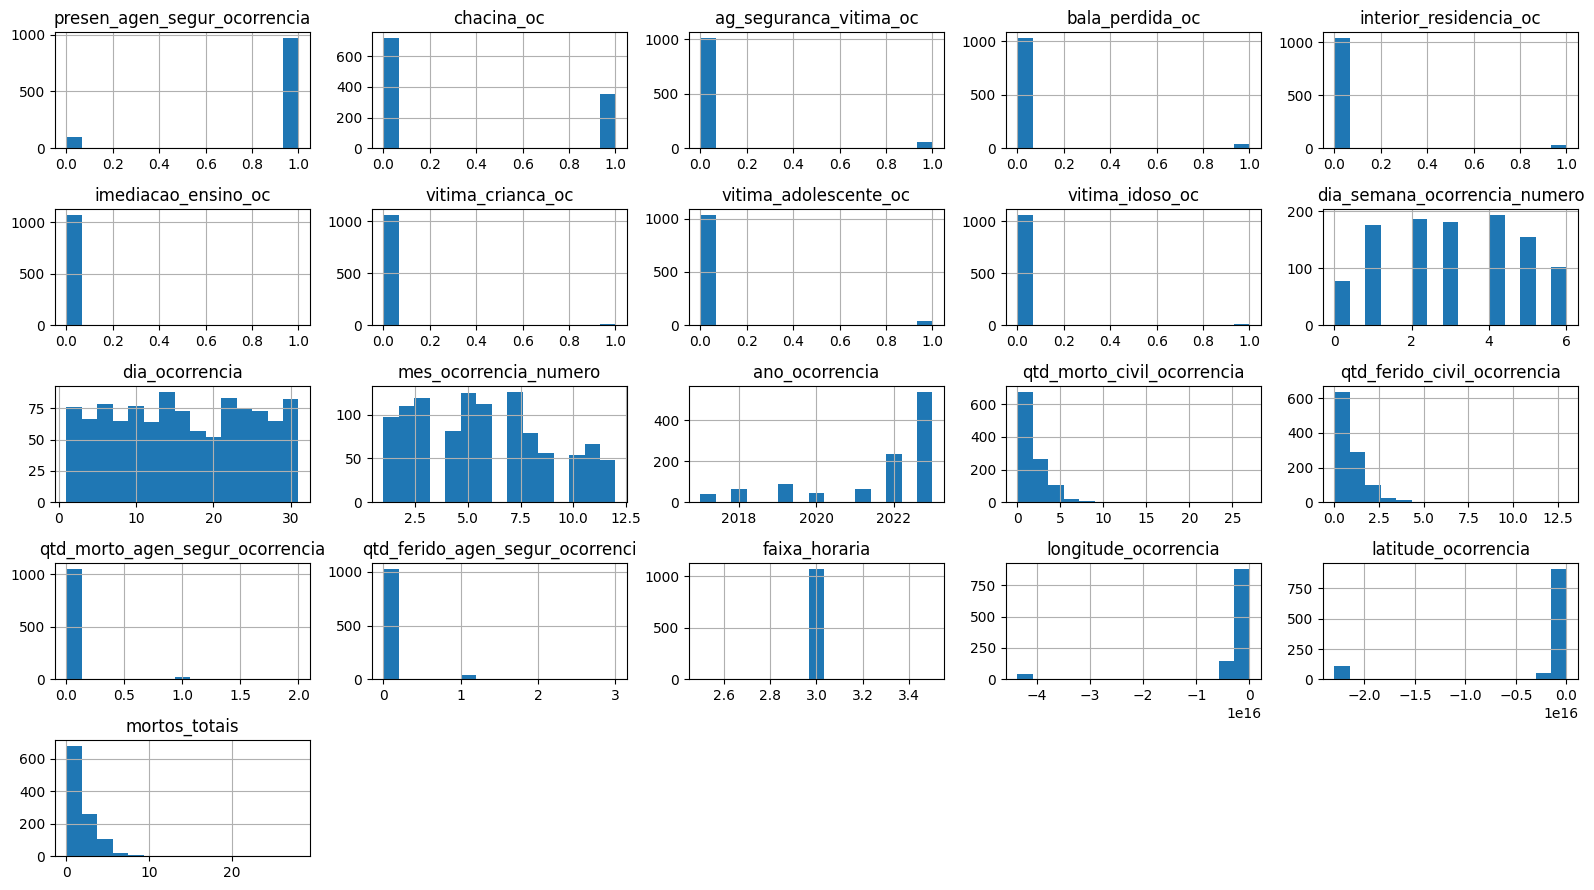

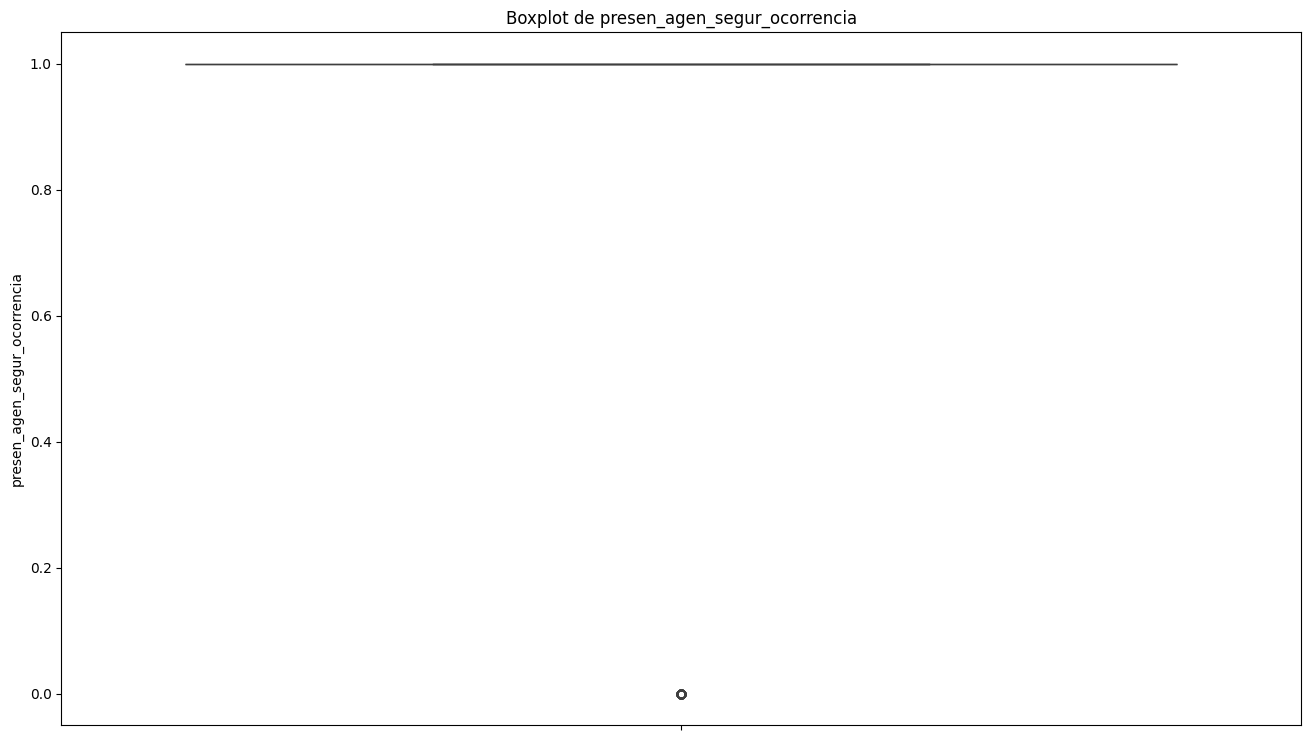

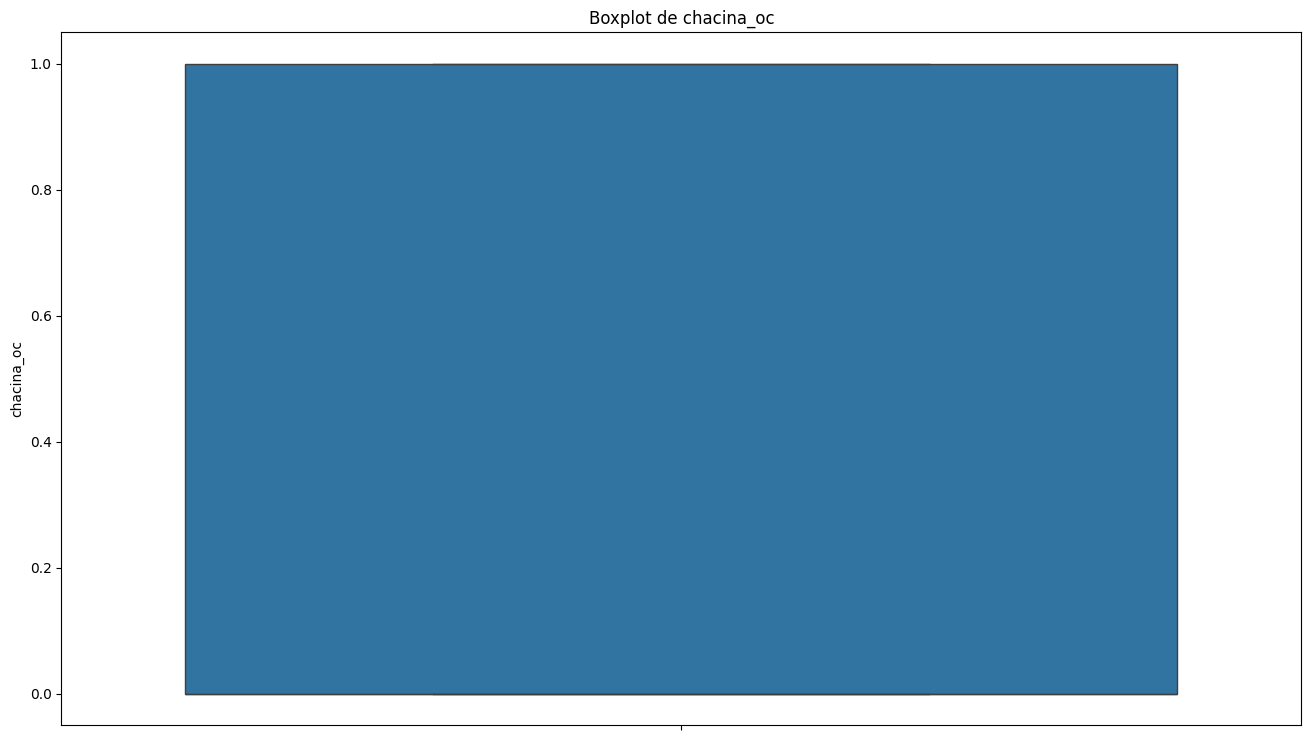

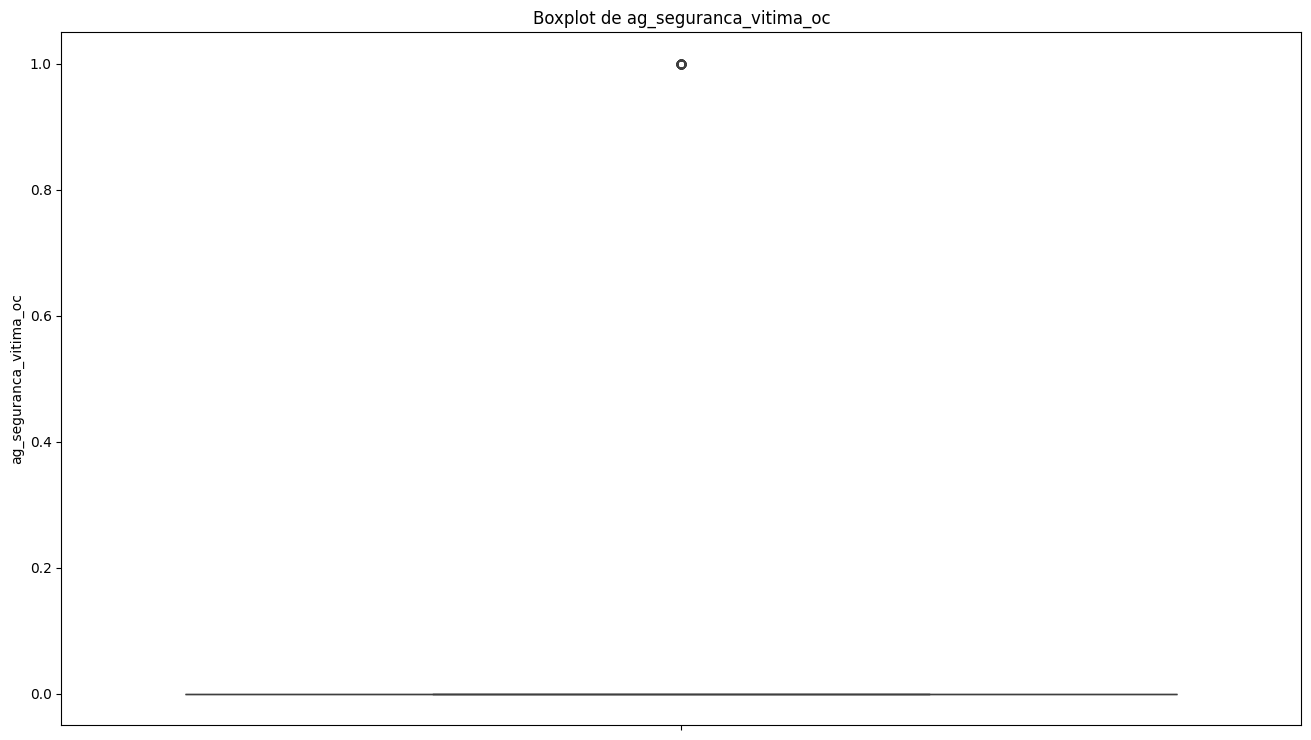

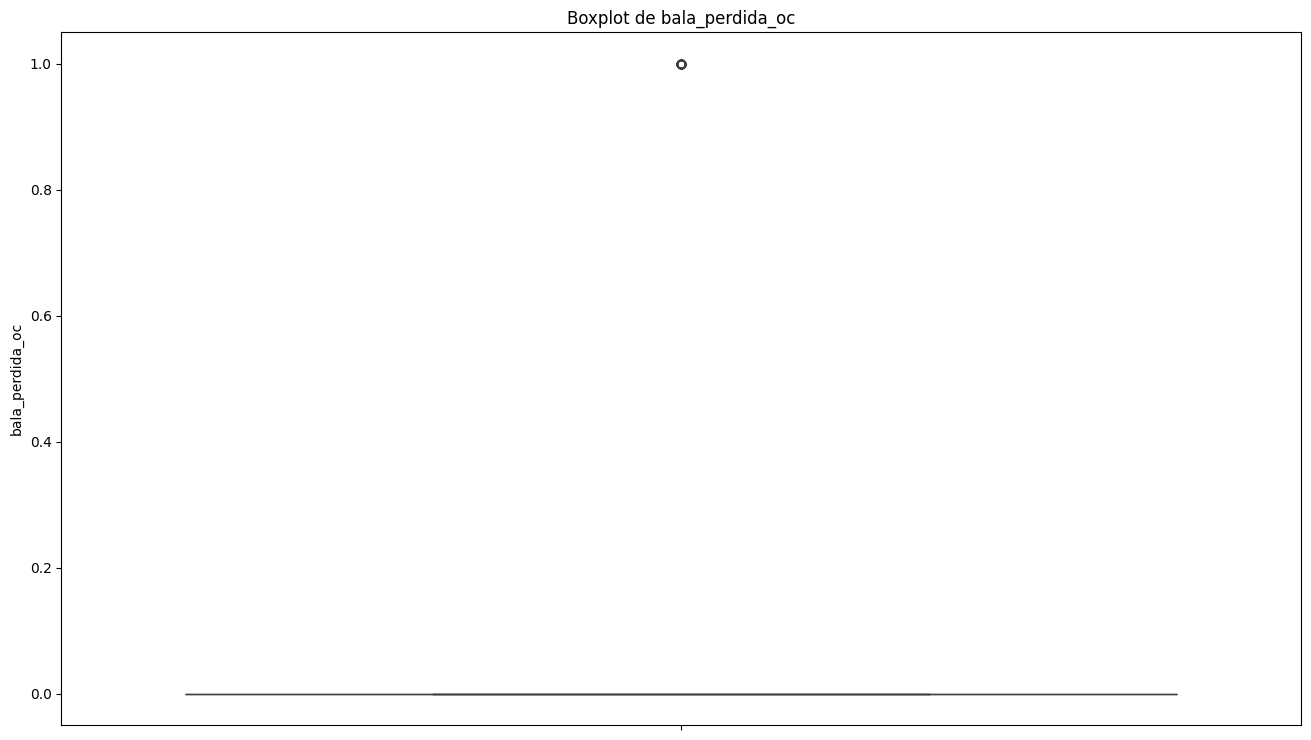

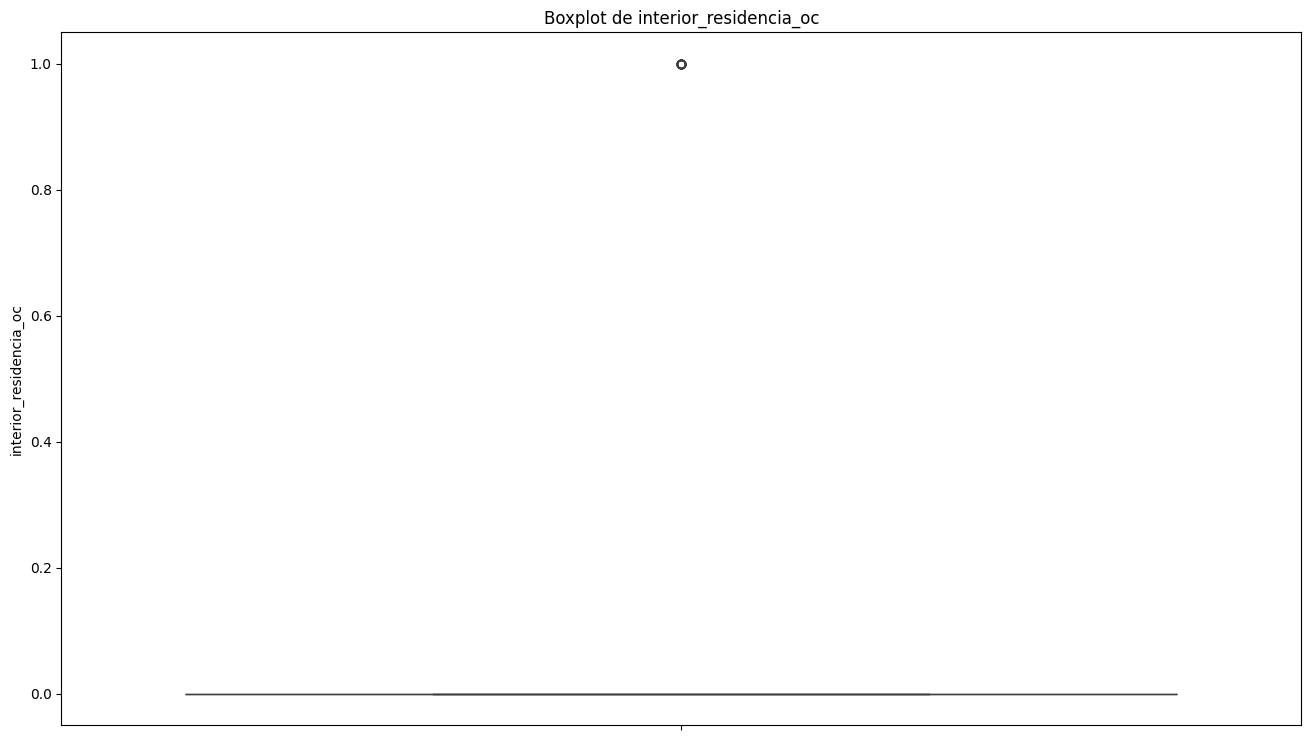

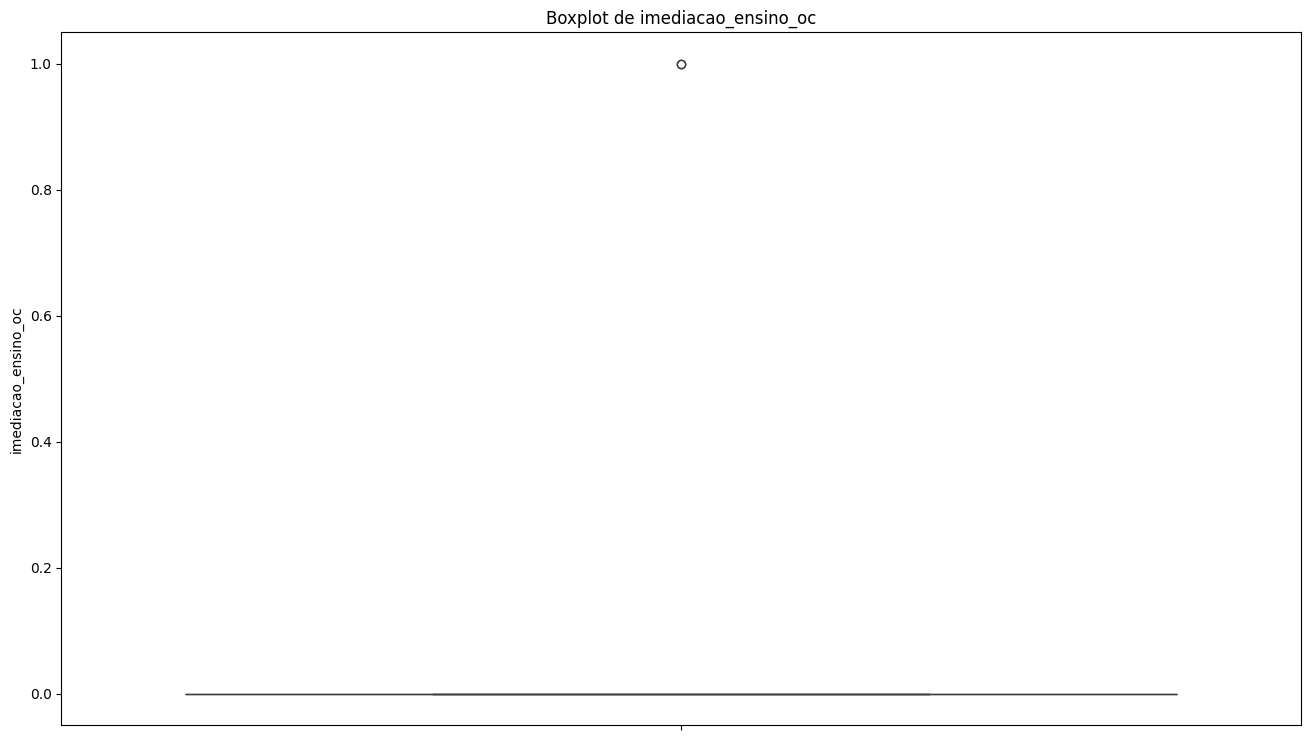

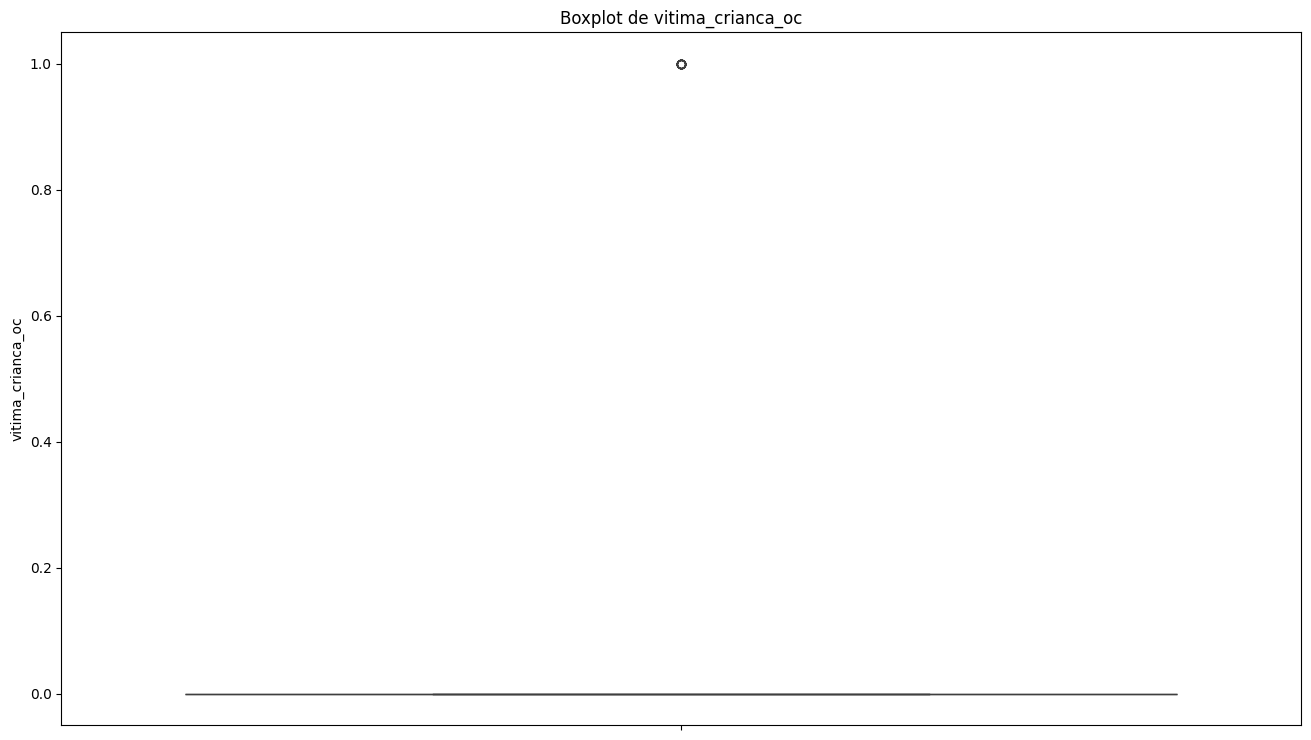

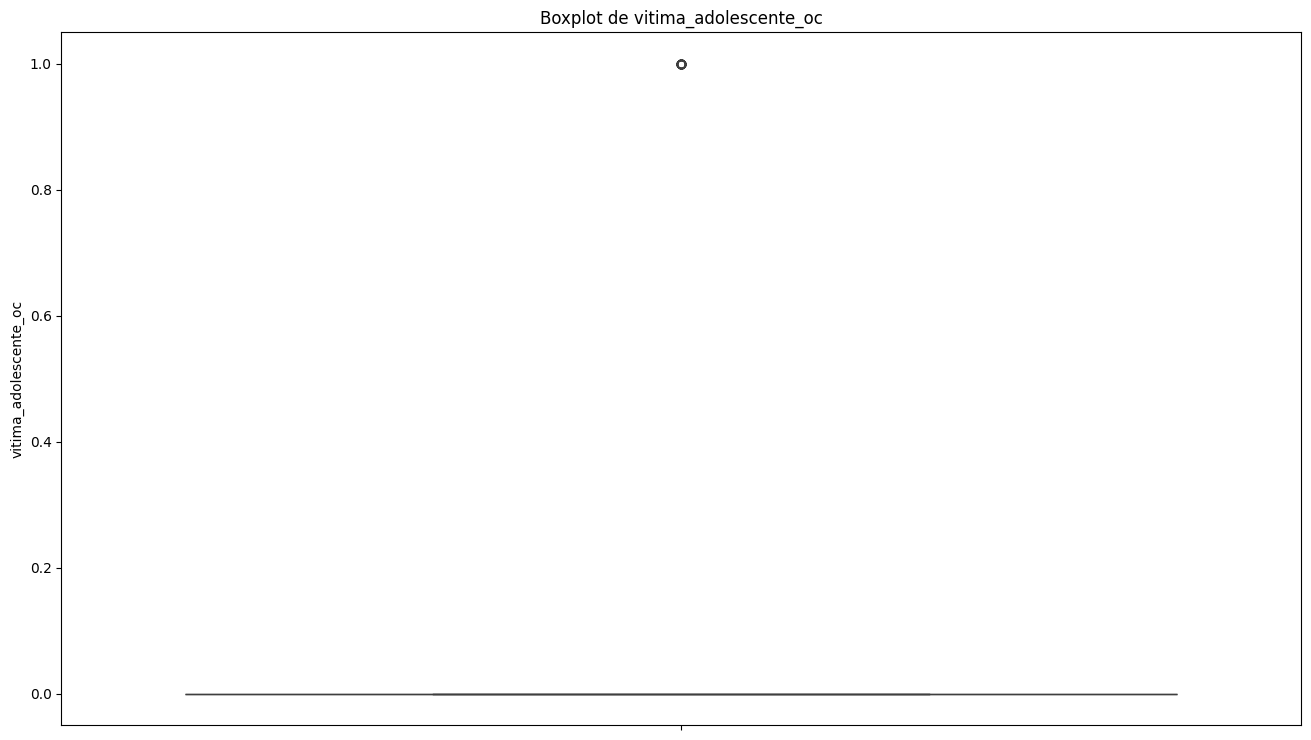

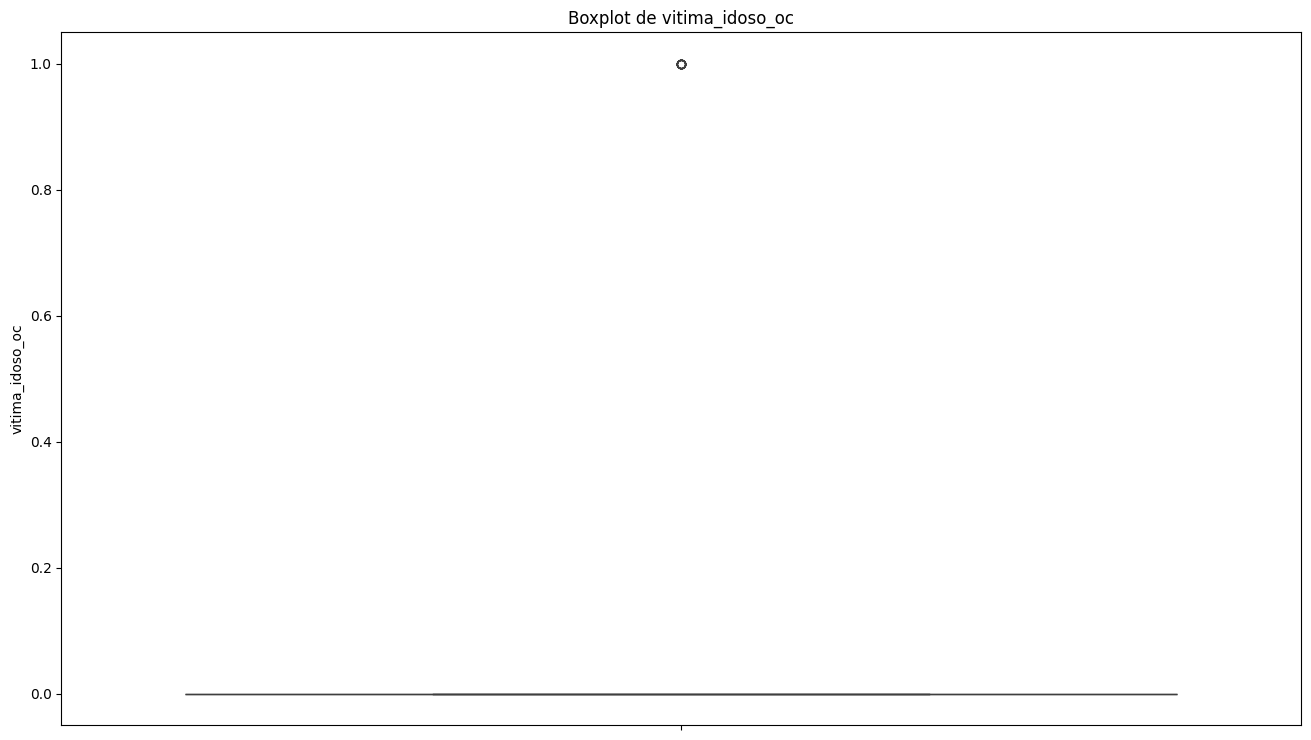

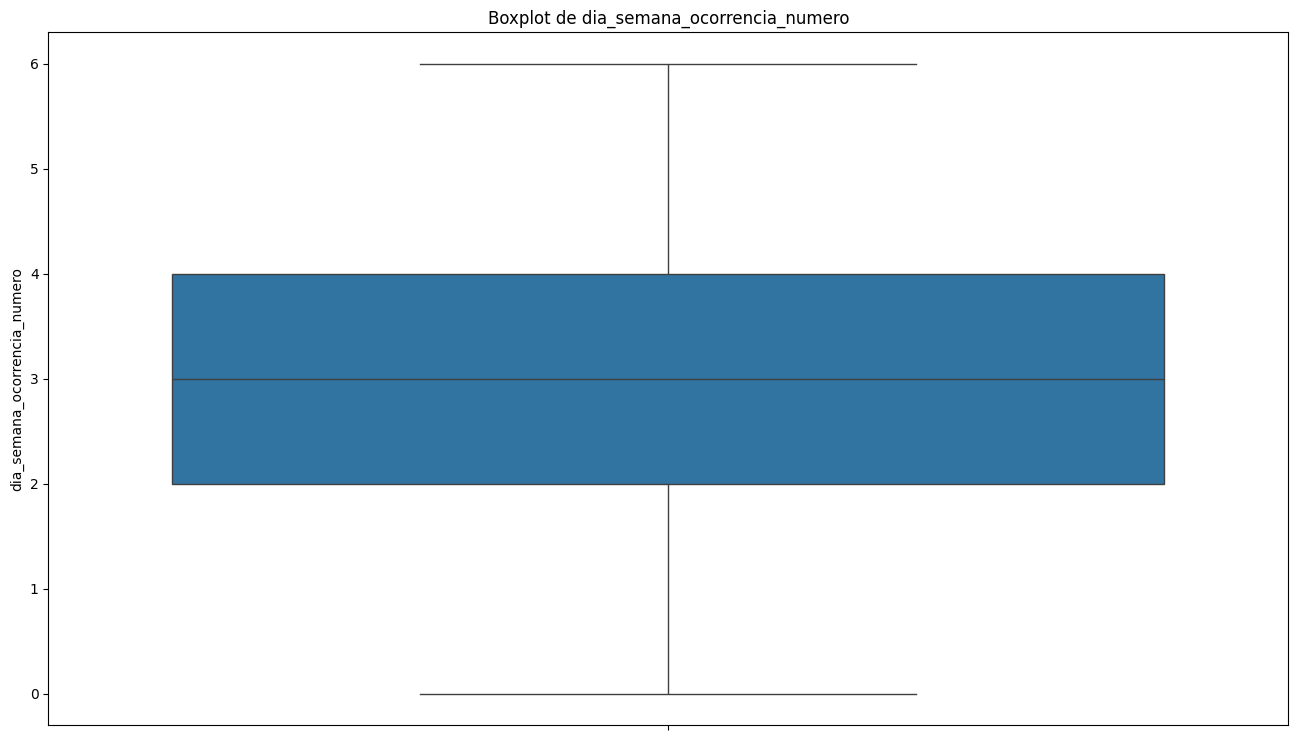

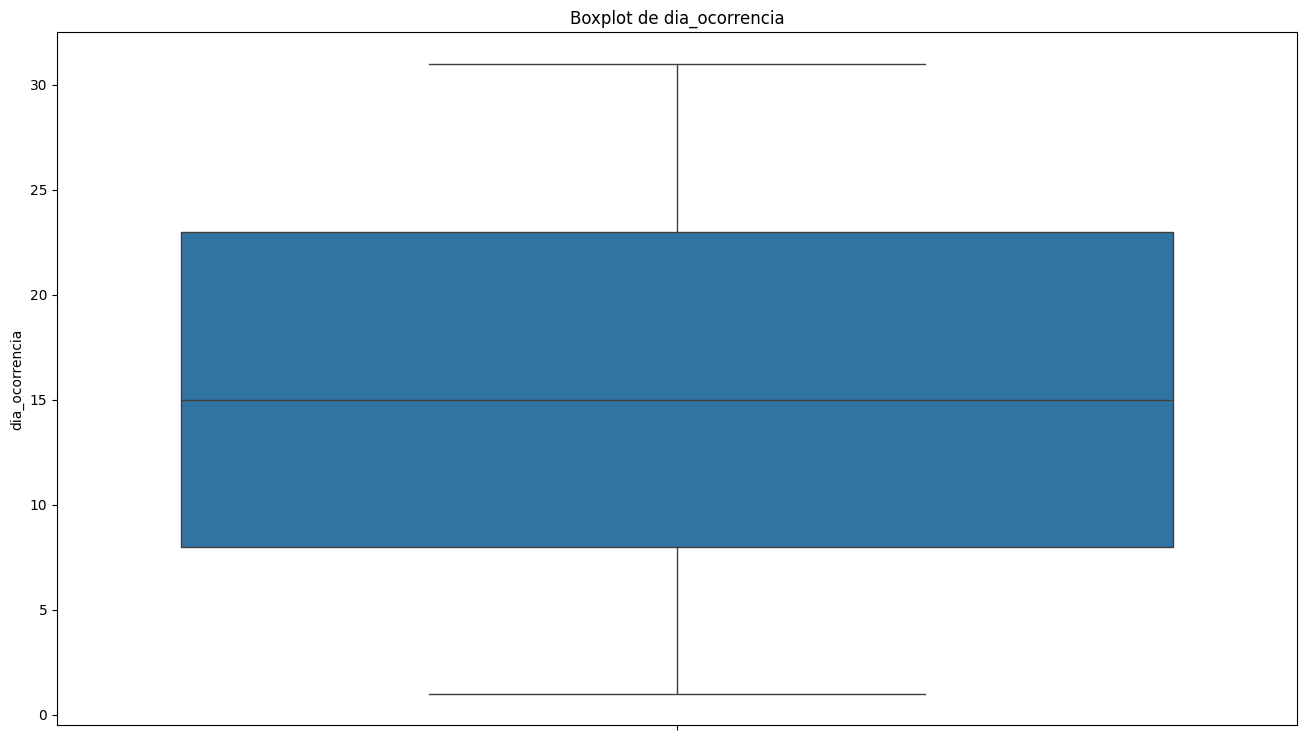

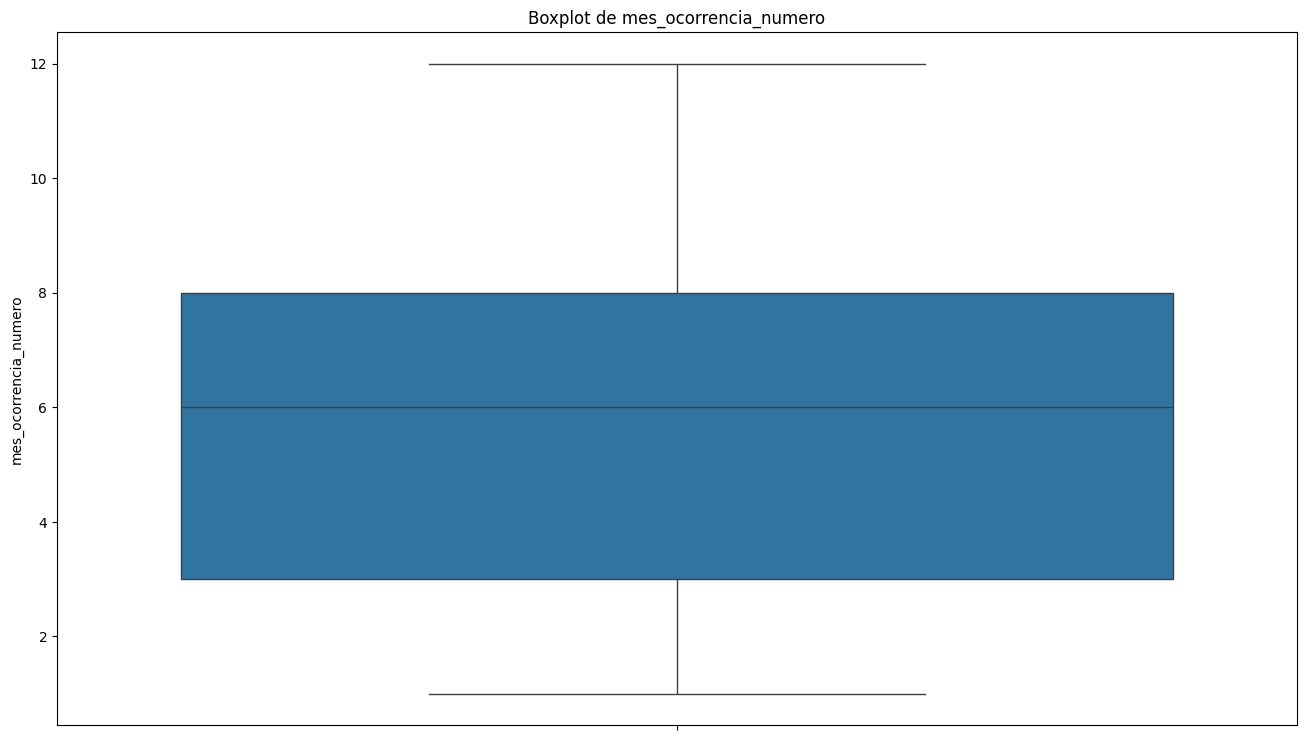

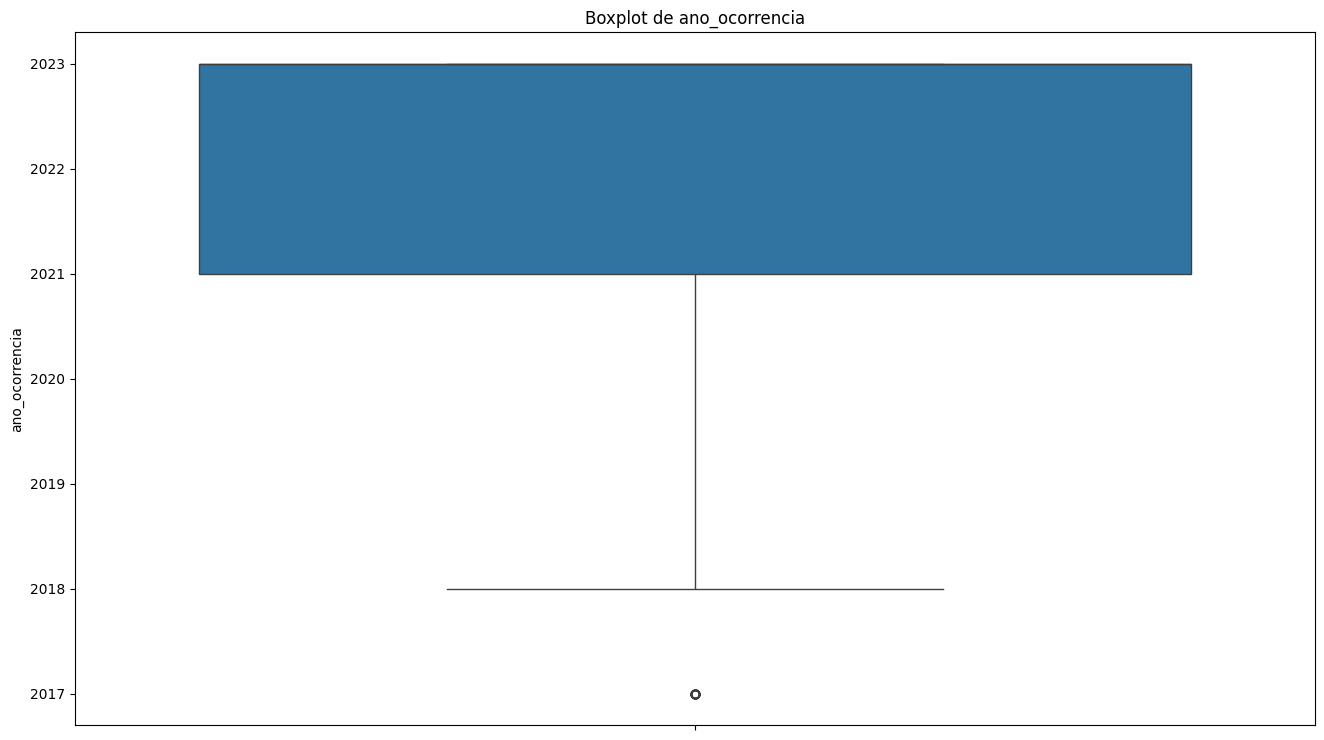

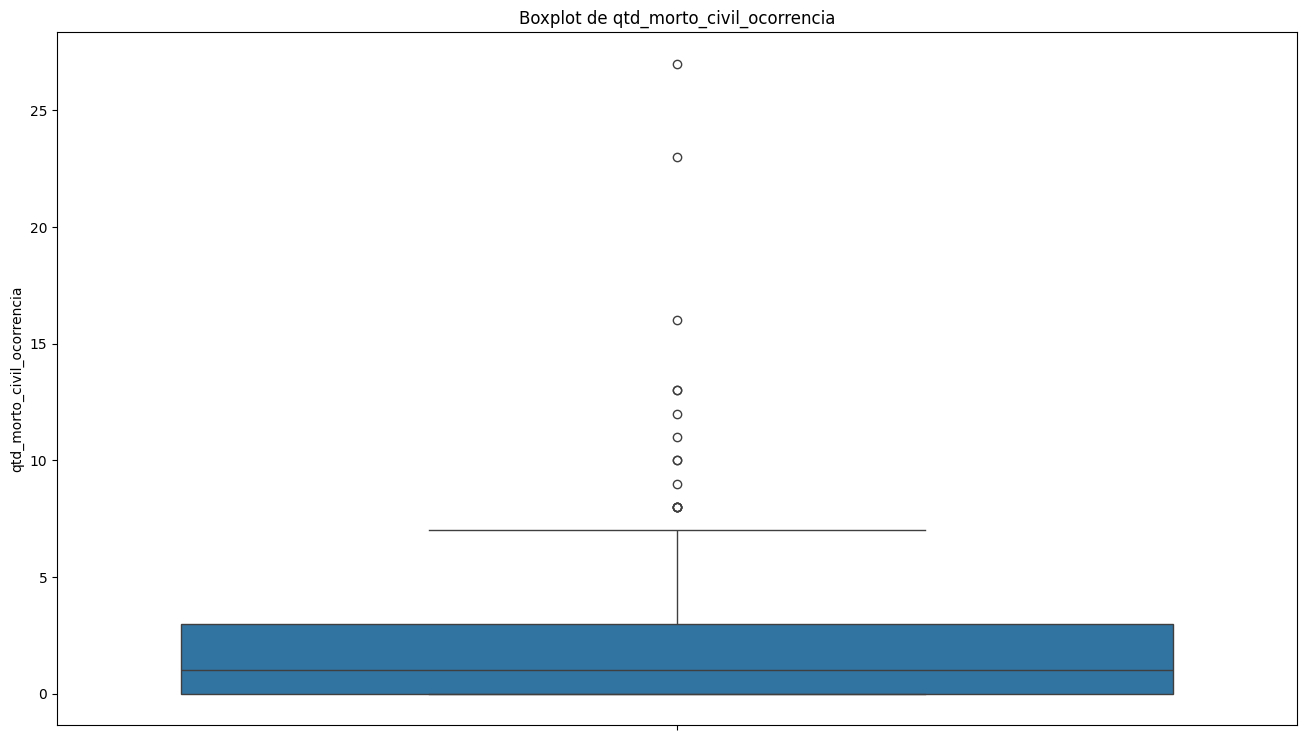

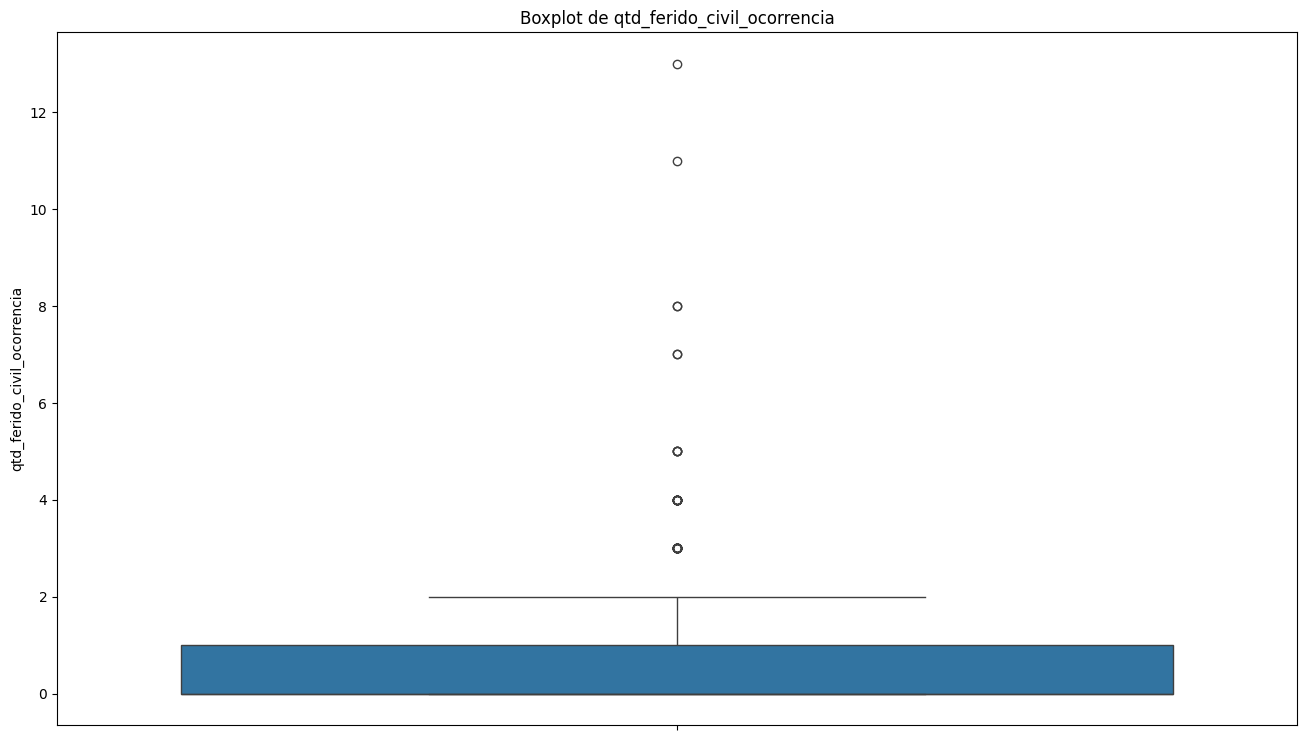

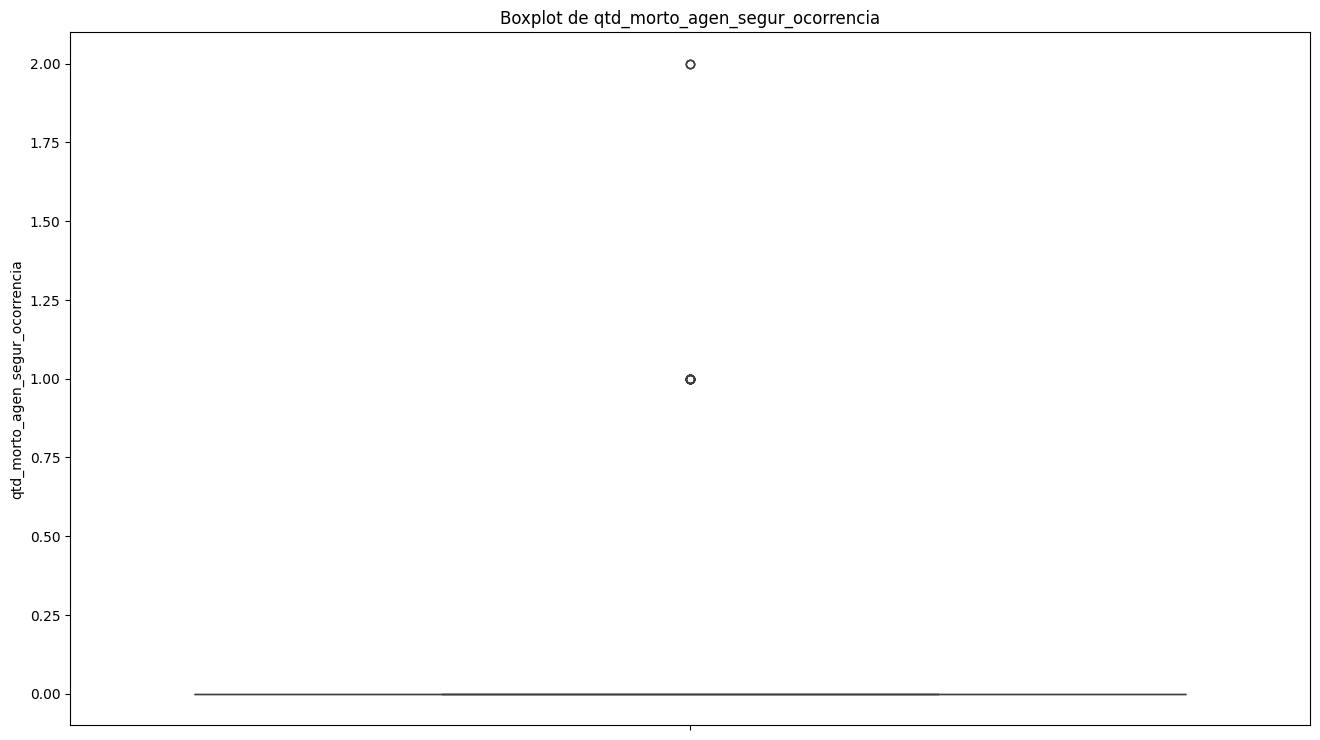

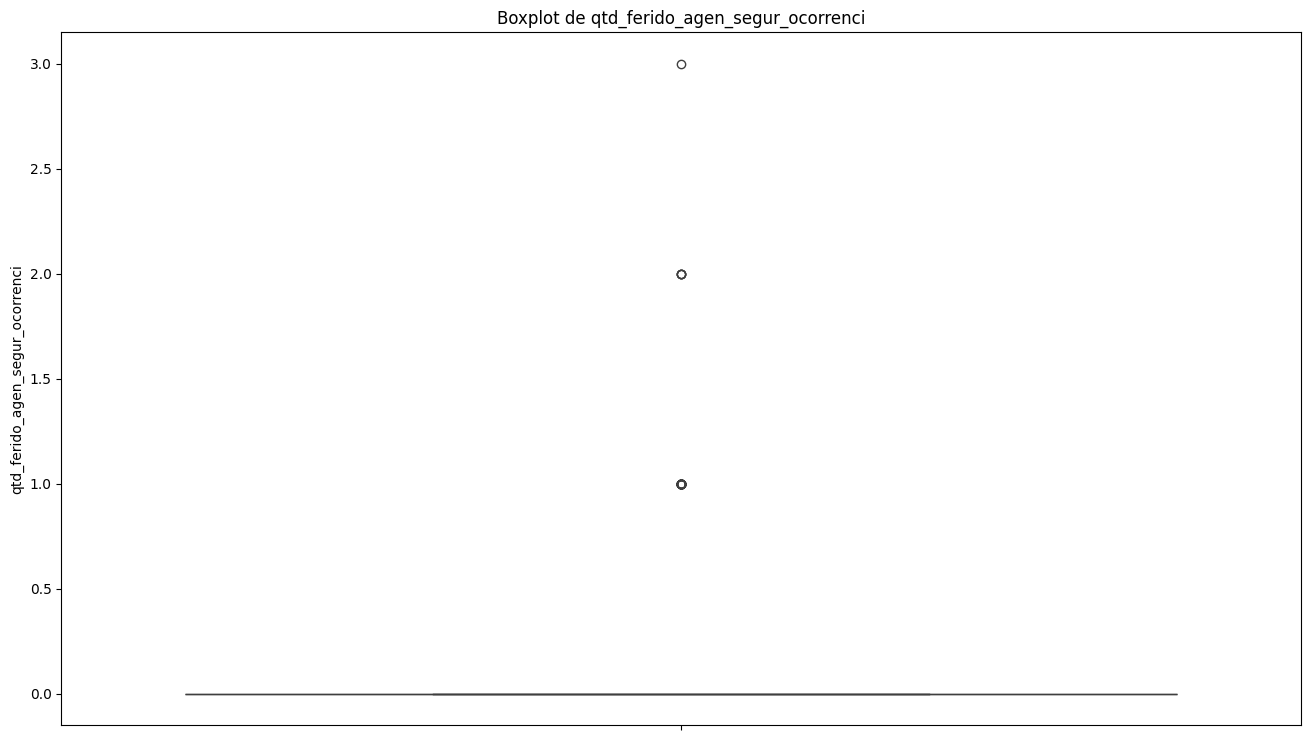

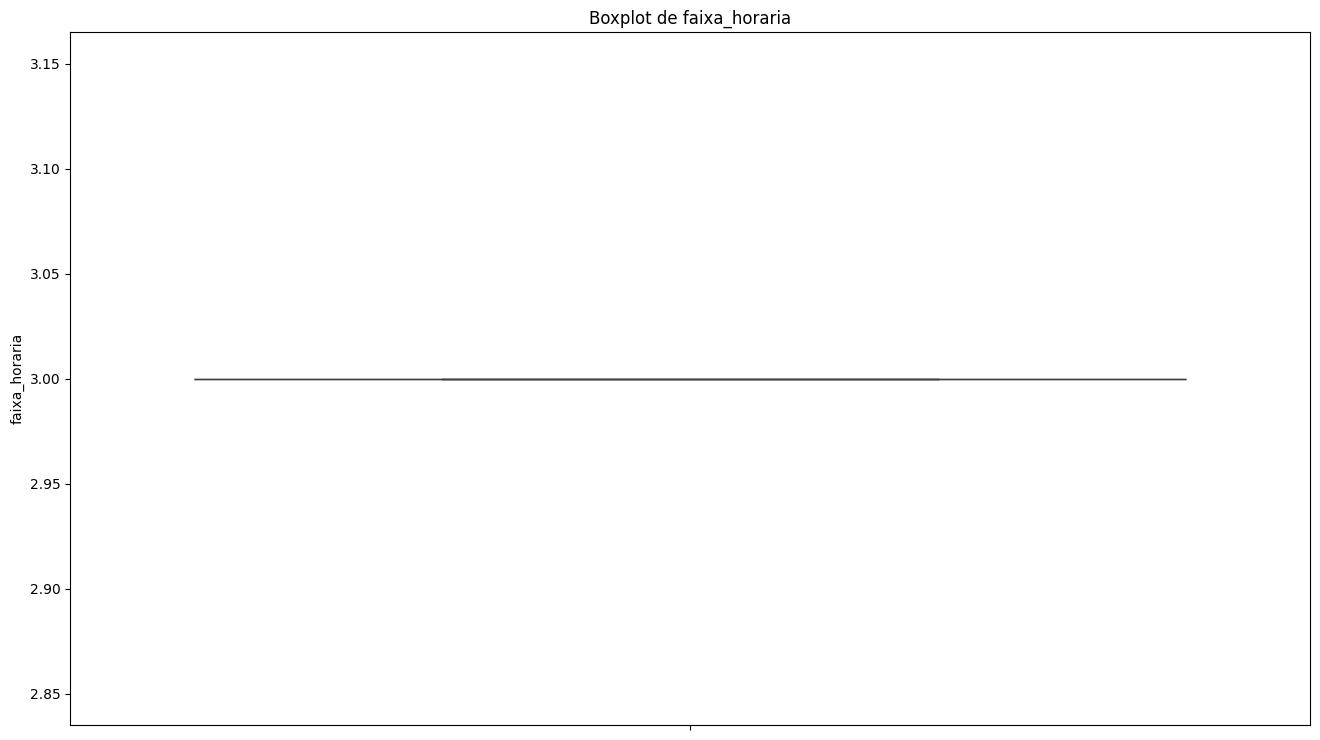

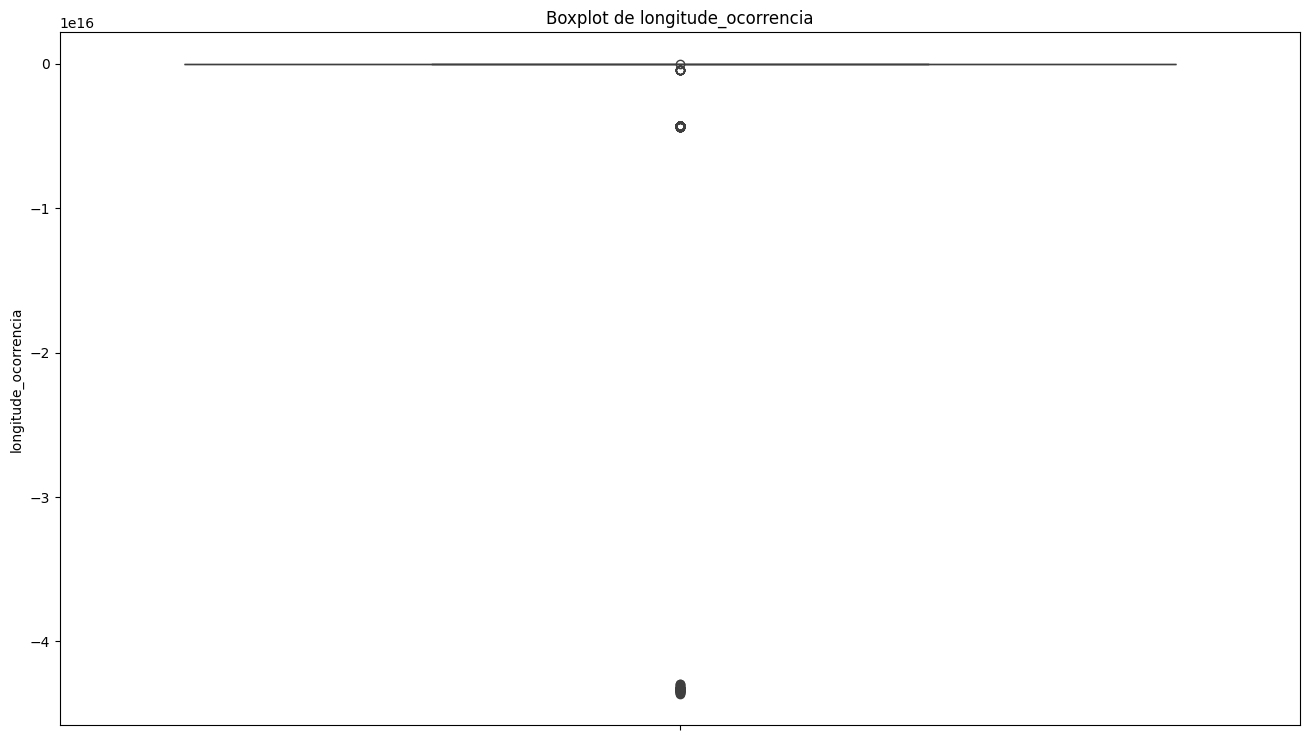

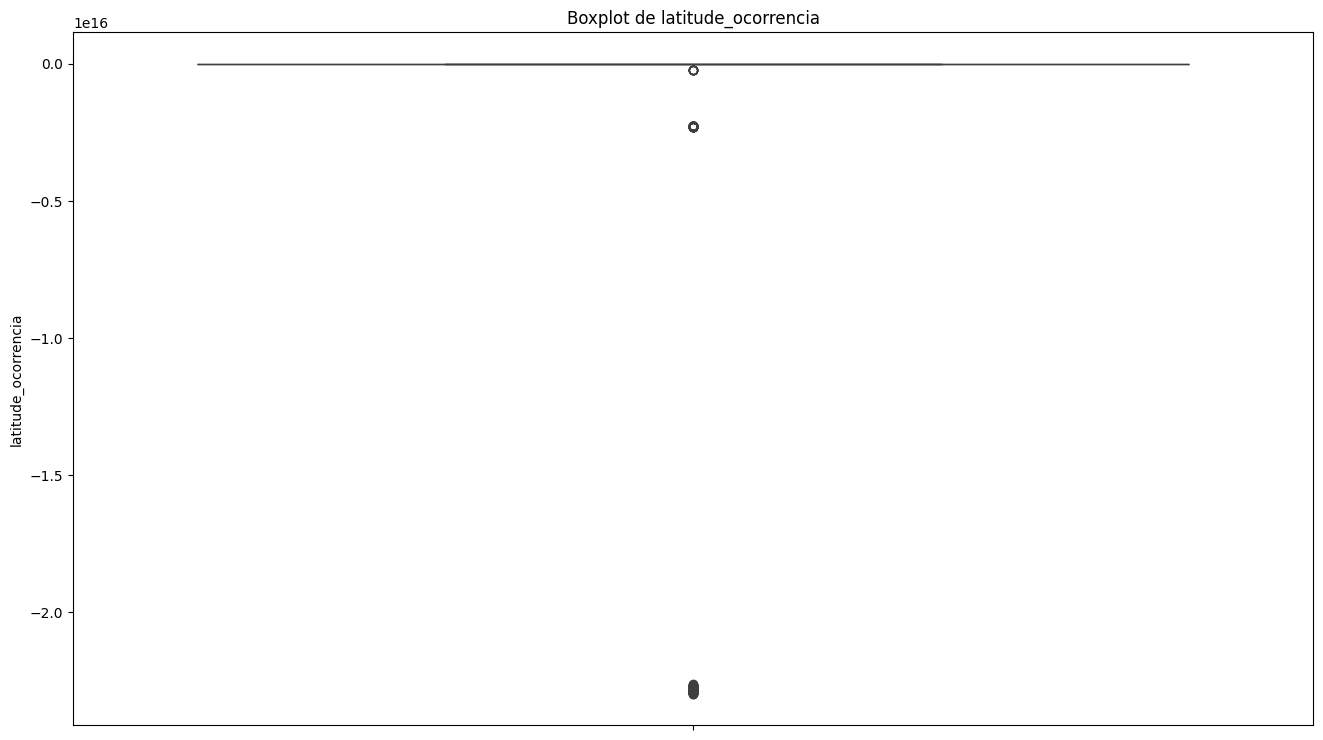

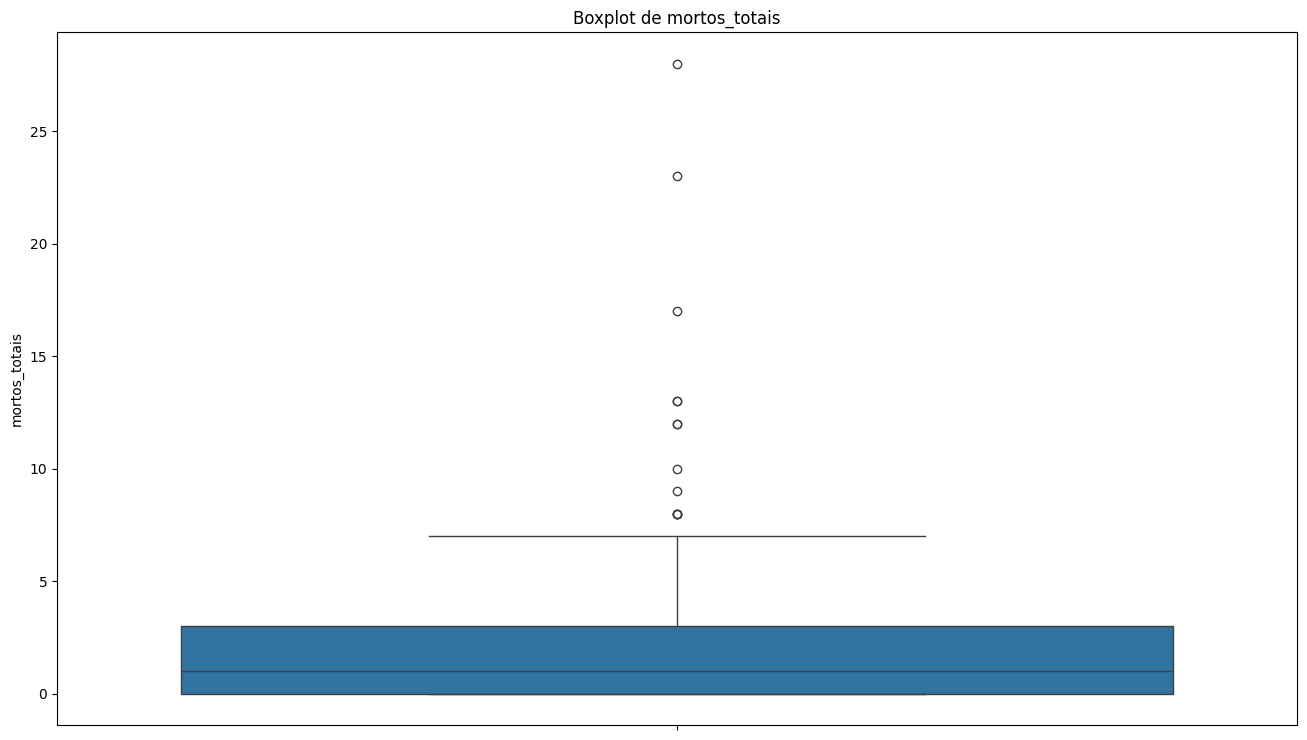

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separando as colunas numericas
numeric_cols = df_cluster.select_dtypes(include=[np.number]).columns.tolist()

print("Colunas numéricas iniciais:")
print(numeric_cols)

# Histogramas
df_cluster.hist(figsize=(16, 9), bins=15)
plt.tight_layout()
plt.show()

# Boxplots
for col in numeric_cols:
    plt.figure(figsize=(16, 9))
    sns.boxplot(y=df_cluster[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

In [148]:
from sklearn.preprocessing import QuantileTransformer

# Extraímos só essas colunas numa matriz
X = df_cluster[numeric_cols].values

# Criamos o transformer
# n_quantiles pode ser menor que o número de linhas; 1000 é comum.
# 'output_distribution' pode ser 'uniform' ou 'normal'
qt = QuantileTransformer(n_quantiles=100, output_distribution='normal', random_state=42)

# Fit e transform
X_trans = qt.fit_transform(X)

# Substituímos no DataFrame
df_transformed = df.copy()
df_transformed[numeric_cols] = X_trans

# Agora, df_transformed tem as colunas transformadas
# Se vc quiser conferir a nova distribuição:
print(df_transformed[numeric_cols].describe())

       presen_agen_segur_ocorrencia   chacina_oc  ag_seguranca_vitima_oc  \
count                   1074.000000  1074.000000             1074.000000   
mean                       4.211754    -1.762159               -4.599042   
std                        3.050066     4.893895                2.426398   
min                       -5.199338    -5.199338               -5.199338   
25%                        5.199338    -5.199338               -5.199338   
50%                        5.199338    -5.199338               -5.199338   
75%                        5.199338     5.199338               -5.199338   
max                        5.199338     5.199338                5.199338   

       bala_perdida_oc  interior_residencia_oc  imediacao_ensino_oc  \
count      1074.000000             1074.000000          1074.000000   
mean         -4.773321               -4.899190            -5.179973   
std           2.062153                1.741803             0.448527   
min          -5.199338         